## Introduction

An insurance company is looking to expand their product selection. They are currently providing health insurance to their policyholders but now want to gauge interest on vehicle insurance. Our goal is to create a model that will predict current customers' interest in also purchasing vehicle insurance to create an outreach strategy. 

The questions we attempted to answer included:
- ***Which customers would be more interested in buying vehicle insurance? Should we target customers who already have vehicle insurance or customers who do not have vehicle insurance yet?***

- ***Which customers would be willing to buy insurance based on historical vehicle damage? Do customers who have previously damaged their vehicles are more likely to purchase vehicle insurance?***

- ***Which customers would be willing to buy insurance based on annual premium paid for health insurance? Do customers who have more expensive premium are more likely to purchase vehicle insurance?***


Our analysis focuses on exploring the data of customers who we know their interest on vehicle interest. We can also use this data that  tells us if a customer is interested or not by finding correlations between specific factors and their response and to train a predictive model that can guess based on known information of the policyholder, if they will be interested or not. If take advantage of this information, we can more precisely target certain customers and save costs on marketing or outreach. Our findings can we applied to other company's that are looking to cross-sell. It is recommended to use this apporach if outreach to all customers will be potentially costly or ineffective. Because this approach itself incurs its own costs, cross-selling should be willing to invest this much to increase the probability of securing the sale of an additional product.

The information of the insurance company's existing policy holders includes demographic data (age, gender, region), vehicle information (vehicle age, accident history), and their history with the company (health insurance annual premium, number of days with company). Our model is built using supervised learning which means that all the customers in our dataset have a known label of either interested or not interested in vehicle insurance. We downloaded this dataset from Kaggle.  



## Choice for Heavier Grading on Data Processing or Data Analysis

We would like to choose **Data Analysis** for the following reasons:
1. We are building a classification model to predict the response variable which involves analysing independent variables and relationship between dependent and independent variables. 
2. Our dataset was moderately clean and did not require heavy data processing to make it usable
3. The questions we are trying to answer through this project requires a lot of analysis on the data 

## Data Processing

Import libraries and load dataset

In [1]:
# Import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, KFold, cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix ,classification_report,precision_score, recall_score ,f1_score, roc_curve, roc_auc_score, accuracy_score 
from sklearn.svm import SVC
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Load training data from Kaggle 
train=pd.read_csv('/content/train.csv',index_col='id')

# Show first 5 instances
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
# Create a copy dataset to avoid altering original data
train_copy=train.copy()

In [5]:
# Check if there are any missing values in dataset
train_copy.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Before trying to explore data set, we need to check the data types of each variable to ensure all numerical values are either integers or floats and not strings. 

In [6]:
# Checking for integer or float data types in each numeric column before processing 
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381109 entries, 1 to 381109
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 34.9+ MB


In addition to confirming the correct data type of each variable, finding how many unique values in each variable can help us categorize each column as **categorical or continuous variables**. For example, variables with 2 or 3 unique values can be considered as categorical variables, so Gender, Driving_License, Previously_Insured, Vehicle_Age, Vehicle_Damage, and Response would be processed differently than Anual_Premium or Age. 

In [7]:
# Showing count of unique values to describe data within each column and find categorical variables
print('Columns and number of unique values')
dict=[]
for i in train_copy.columns:
    print(f'{i} --> {train_copy[i].nunique()}')

Columns and number of unique values
Gender --> 2
Age --> 66
Driving_License --> 2
Region_Code --> 53
Previously_Insured --> 2
Vehicle_Age --> 3
Vehicle_Damage --> 2
Annual_Premium --> 48838
Policy_Sales_Channel --> 155
Vintage --> 290
Response --> 2


Statistics on **Numerical** **columns**


In [8]:
#Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame.
df2 = pd.DataFrame(round(train_copy.describe([.25,.5,.75,.9,.99]),2))
df2

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.00,381109.00,381109.00,381109.00,381109.00,381109.00,381109.00,381109.00
mean,38.82,1.00,26.39,0.46,30564.39,112.03,154.35,0.12
std,15.51,0.05,13.23,0.50,17213.16,54.20,83.67,0.33
min,20.00,0.00,0.00,0.00,2630.00,1.00,10.00,0.00
25%,25.00,1.00,15.00,0.00,24405.00,29.00,82.00,0.00
50%,36.00,1.00,28.00,0.00,31669.00,133.00,154.00,0.00
75%,49.00,1.00,35.00,1.00,39400.00,152.00,227.00,0.00
90%,62.00,1.00,46.00,1.00,48431.00,156.00,270.00,1.00
99%,77.00,1.00,50.00,1.00,72963.00,160.00,297.00,1.00
max,85.00,1.00,52.00,1.00,540165.00,163.00,299.00,1.00


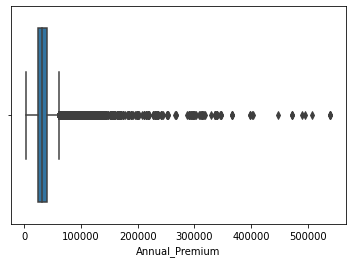

In [9]:
# Create box plot of annual premium to see the trends
sns.boxplot(x=train_copy['Annual_Premium'])

**Observation**

By studying the statistics from the dataframe we can see that there is a huge difference in the distribution of the Annual_Premium, so from that we can say that the data **Annual_Premium** has outliers. Here we are identifying these outliers from the datset. 

### Outlier Treatment

As there are some outliers in the distribution of Annual_Premium, to avoid variability in a measurement and experimental errors. We are using Z- score method with providing threshold to remove the outliers on-demand basis.

1. Z-Score is tells us how far the value is from the mean
2. The threshold value for the z score is to classify a point as an outlier or not.

In [10]:
# Identifying outliers for Annual Premium
# Obtain z scores of Annual Premium 
z_scores = np.abs(stats.zscore(train_copy['Annual_Premium']))

# Assign threshold for outliers based on z score
outlier_threshold = 3

# Training dataset without outliers
train_copy = train_copy[z_scores < outlier_threshold]
train_copy.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [11]:
# Create lists of column names for numeric variables and non numeric variables
numeric_datacolumns = ['Age', 'Region_Code','Annual_Premium','Vintage', 'Policy_Sales_Channel', 'Driving_License', 'Previously_Insured', 'Response']
non_numeric_datacolumns = ['Gender','Vehicle_Age','Vehicle_Damage']

Statistics on **Categorical columns**

In [12]:
train_copy[non_numeric_datacolumns].describe()

,Gender,Vehicle_Age,Vehicle_Damage
count,379026,379026,379026
unique,2,3,2
top,Male,1-2 Year,Yes
freq,204915,199127,191296


**Observations**
1. There are more number of males are there than female.<br/>
2. The number of vehicles which are aged between 1-2 year are more.<br/>
3. There are more number of damaged vehicle compared to undamaged.<br/>

## Data Analysis

To successfully cross-sell vehicle insurance to the existing health insurance customers, it is necessary to target the right customers. Based on the availability of data, we can attempt to answer most of the below questions by using data visualization techniques. Sales and marketing efforts can be concentrated towards the people who would be more willing to buy vehicle insurance based on our analysis.

***Which customers would be more interested in buying vehicle insurance? Should we target customers who already have vehicle insurance or customers who do not have vehicle insurance yet?***

Using visualization to analyze response rates of customers who are previously insured and how many customers don't have vehicle insurance. From this analysis we can get to know the potential clients who are planning to get insurance.

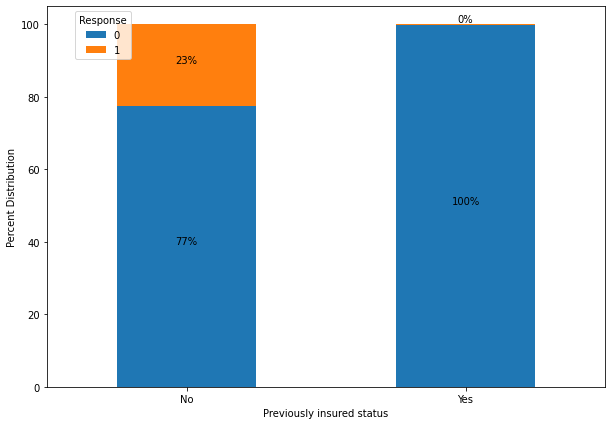

In [13]:
# Creating a stacked bar chart to show whether customers who have vehicle insurance would be interested in buying our 
# company's vehicle insurance or not

ax= pd.crosstab(train_copy['Previously_Insured'], train_copy['Response']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(10,7),stacked=True, rot=0)

plt.legend(loc='upper center', bbox_to_anchor=(0.1, 1.0), title="Response")

plt.xlabel('Previously insured status')
plt.ylabel('Percent Distribution')
ax_1.set_xticklabels(['No','Yes'])
for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')
plt.show()

**Inference**<br/>
According to the analysis, it is evident that many customers who don't previously have vehicle insurance would be interested to buy our vehicle insurance. From a business perspective, we need to target customers who do not have vehicle insurance instead of trying to convince customers with vehicle insurance to switch to our policy.

***Which customers would be willing to buy insurance based on historical vehicle damage? Do customers who have previously damaged their vehicles are more likely to purchase vehicle insurance?***

Using visualization to analyze whether the response depends on 
customer vehicle has any history of damage in the past or not.

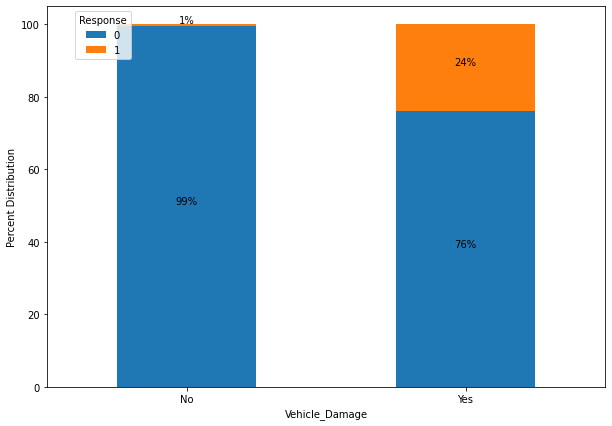

In [14]:
## Create a stacked bar plot to visualize the response depends on historical vehicle damage

ax= pd.crosstab(train_copy['Vehicle_Damage'], train_copy['Response']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(10,7),stacked=True, rot=0)

plt.legend(loc='upper center', bbox_to_anchor=(0.1, 1.0), title="Response")

plt.xlabel('Vehicle_Damage')
plt.ylabel('Percent Distribution')

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')

plt.show()

**Inference**<br/>
According to the data, more people who responded that they are willing to buy car insurance have a past history of vehicle damage than customers who have never had a vehicle damage, thus the firm should focus more on customers with a history of vehicle damage to market their product. From a business perspective we need to target our customer acquisition efforts on people who have some vehicle accidents/damage previously. It is also profitable for our company to target such customers as we can charge a higher premium for these customers.

***Which customers would be willing to buy insurance based on vehicle age? Do customers who have newer vehicles are more likely to purchase vehicle insurance?***

Using visualization to analyze whether the response depends on how old the customer's vehicle is or not

In [15]:
#Splitting customers according to vehicle age and analysing based on response

old = train_copy[train_copy['Vehicle_Age']=='> 2 Years']
mid = train_copy[train_copy['Vehicle_Age']=='1-2 Year']
new = train_copy[train_copy['Vehicle_Age']=='< 1 Year']

sum_old= sum(old['Response'].value_counts())
sum_mid= sum(mid['Response'].value_counts())
sum_new= sum(new['Response'].value_counts())
PERCENT_VALUE = 100
percentResp_old = ((old['Response'].value_counts()/sum_old)*PERCENT_VALUE)
percentResp_mid = ((mid['Response'].value_counts()/sum_mid)*PERCENT_VALUE)
percentResp_new = ((new['Response'].value_counts()/sum_new)*PERCENT_VALUE)

column_names = ["<1 year", "1-2 years", ">2 years"]
df10 = pd.DataFrame(columns = column_names)
df10['<1 year']= percentResp_new
df10['1-2 years']= percentResp_mid
df10['>2 years']= percentResp_old

df10.rename(index={0.0: 'Response-No', 1.0 : 'Response-Yes'}, inplace= True)

df11 = df10.T
#df11.drop(columns=['No'], inplace= True)
df11

,Response-No,Response-Yes
<1 year,95.628559,4.371441
1-2 years,82.638718,17.361282
>2 years,70.700637,29.299363


**Inference**<br/>
We can observe from the analysis that customers who have a new vehicle are less interested than customers who have a car which is more than 1-2 years old or more than two years. To sell the most insurance, the company should focus on consumers with older vehicles rather than new ones. This may be explained by people wanting to switch auto insurance after some years to get a better premium


***Which customers would be willing to buy insurance based on annual premium paid for health insurance? Do customers who have more expensive premium are more likely to purchase vehicle insurance?***

To visualize we bin the annual premium into 5 bins, each specifying the range of the amount paid in the annual premium for the health insurance.
The distribution of annual premium paid in USD($) is as follows:

* Premium <  13,000

* 13,000 < Premium < 26,000

* 26,000 < Premium <  39,000

* 39,000 < Premium <  52,000

* Premium >  52,000


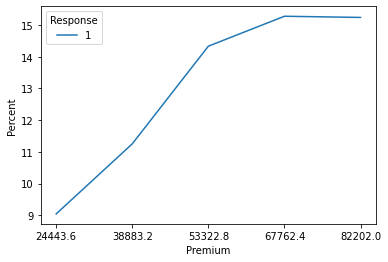

In [16]:
#Splitting customers based on annual premium and analyzing their response

bin_labels=['24443.6','38883.2','53322.8','67762.4','82202.0']
train_copy_new=train_copy[['Annual_Premium','Response']].sort_values(by=['Annual_Premium'],ascending=False)

# Filter out values less than 10,000
train_copy_new=train_copy_new[train_copy_new['Annual_Premium']>10000]


train_copy_new['Premium'] = pd.cut(train_copy_new['Annual_Premium'],5, labels=bin_labels)
train_copy_new

train_copy_new = train_copy_new.groupby('Premium')['Response'].value_counts(normalize=True)
train_copy_new = train_copy_new.mul(100).rename('Percent').reset_index()

sns.lineplot(x = 'Premium', y = 'Percent', data=train_copy_new[train_copy_new['Response']==1], hue='Response')

**Inference**

There is a linear relationship between annual premium and customer willingness to buy our vehicle insurance. We should target customers who pay a higher premium for their health insurance as they are more inclined to buy our vehicle insurance. This may be either because they are well off or because they are risk averse hence tend to buy insurance. 

### **Pre-processing data for building a classification model**

We need to process the data before using it to build the model. The steps to process the data are:


1.  Converting categorical variables to numerical variables
2.  Scaling the numerical variables
3.  Using sampling techniques to balance the dataset
4.  Identify variables with high multicollinearity using variance inflation factor




**Converting categorical variables to numerical values**

Since the model cannot evaluate text data type, we convert the categorical variables to numerical values

In [17]:
# Converting categorical variables into numerical variables
replace_map = {'Gender': {'Male': 1, 'Female': 0},'Vehicle_Age': {'> 2 Years': 2,'1-2 Year': 1,'< 1 Year':0},'Vehicle_Damage': {'Yes':1,'No':0}}
train_copy.replace(replace_map,inplace=True)

In [18]:
# Create lists of column names for numeric variables and categorical variables
numerical_datacolumns = ['Age','Annual_Premium','Vintage']
categorical_datacolumns = ['Gender','Vehicle_Age','Vehicle_Damage', 'Region_Code', 'Policy_Sales_Channel', 'Previously_Insured', 'Driving_License', 'Response']

In [19]:
# Shows data type for each categorical variable
for column_name in categorical_datacolumns:
     print(f'{column_name} data type: {type(train_copy[column_name].iloc[0])}')

Gender data type: <class 'numpy.int64'>
Vehicle_Age data type: <class 'numpy.int64'>
Vehicle_Damage data type: <class 'numpy.int64'>
Region_Code data type: <class 'numpy.float64'>
Policy_Sales_Channel data type: <class 'numpy.float64'>
Previously_Insured data type: <class 'numpy.int64'>
Driving_License data type: <class 'numpy.int64'>
Response data type: <class 'numpy.int64'>


In [20]:
# Convert categorical variables from numeric
for column_name in categorical_datacolumns:
   train_copy[column_name] = train_copy[column_name].astype('category',copy=False)
   print(f'{column_name} data type: {train_copy[column_name].dtypes}')

Gender data type: category
Vehicle_Age data type: category
Vehicle_Damage data type: category
Region_Code data type: category
Policy_Sales_Channel data type: category
Previously_Insured data type: category
Driving_License data type: category
Response data type: category


**Scaling the numerical variables**

Many machine learning algorithms perform better or converge faster when features are on a relatively similar scale and/or close to normally distributed. StandardScaler is a go-to algorithm in the industry.
StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance.
StandardScaler results in a distribution with a standard deviation equal to 1. StandardScaler makes the mean of the distribution 0. About 68% of the values will lie be between -1 and 1.

In [ ]:
# Scaling all the numerical variable to convert them to standard normal form 
scl = StandardScaler()
train_copy[['Age','Annual_Premium','Vintage']] = pd.DataFrame(scl.fit_transform(train_copy[['Age','Annual_Premium','Vintage']]))
train_copy.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,1,2.400284,1,28.0,0,2,1,0.217472,26.0,0.342402,1
2,1,0.529162,1,3.0,0,1,0,0.520613,26.0,-1.522069,0
3,1,-1.148396,1,28.0,0,2,1,-0.095799,26.0,0.581437,1
4,1,-0.632224,1,11.0,1,0,0,-0.167348,152.0,-1.378648,0
5,0,-0.954831,1,41.0,1,0,0,-1.751606,152.0,0.258740,0


In [ ]:
# Null values check
train_copy.dropna(inplace=True)
train_copy.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

**Balancing the dataset**

Oversampling involves introducing a bias to select more samples from one class than from another, to compensate for an imbalance that is already present in the data usually, under-representation of one class in the outcome (dependent) variable. In our case, we need to introduce more cases with the response variable as 1 using random oversampling. Random Oversampling involves supplementing the training data with multiple copies of some of the minority classes. This is one of the earliest proposed methods, that is also proven to be robust. Instead of duplicating every sample in the minority class, some of them may be randomly chosen with replacement.



In [ ]:
# Repopulating the dependent variable to prevent bias to a particular output
res_0 = train_copy[train_copy['Response']==0]
res_1 = train_copy[train_copy['Response']==1]
# Random sampling to ensure that number of records with response 1 is atleast 50% of those with response 0
res_1=res_1.sample(math.floor(res_0.shape[0]*0.5),replace=True)

# Concat the 2 dataframes
train_copy = pd.concat([res_0,res_1])
train_copy.reset_index(inplace=True)
# Set id as index
train_copy['id']= [x for x in range(1,res_0.shape[0]+res_1.shape[0]+1)]
train_copy.set_index(['id'])
train_copy.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,0.529162,1,3.0,0,1,0,0.520613,26.0,-1.522069,0
1,2,1,-0.632224,1,11.0,1,0,0,-0.167348,152.0,-1.378648,0
2,3,0,-0.954831,1,41.0,1,0,0,-1.751606,152.0,0.258740,0
3,4,0,-1.019353,1,33.0,0,0,1,-0.430414,160.0,1.131216,0
4,5,1,1.109855,1,11.0,0,0,1,0.121586,152.0,-0.984241,0


**Multicollinearity using variance inflation factor**

Multicollinearity generally occurs when there are high correlations between two or more predictor variables. In other words, one predictor variable can be used to predict the other. This creates redundant information, skewing the results in a regression model. 

Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables. Mathematically, the VIF for a regression model variable is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable. This ratio is calculated for each independent variable. A high VIF indicates that the associated independent variable is highly collinear with the other variables in the model.

In [ ]:
# Identify multicollinearity between two variables based on VIF(Variance Inflation Factor)
# the independent variables set (excluding categorical variables)
X = train_copy[['Age','Annual_Premium','Vintage','Gender','Vehicle_Age','Vehicle_Damage',
          'Region_Code', 'Policy_Sales_Channel', 'Previously_Insured', 'Driving_License', 'Response']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
 
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
  
print(vif_data)

                 feature        VIF
0                    Age   1.004905
1         Annual_Premium   1.004906
2                Vintage   1.000045
3                 Gender   2.313739
4            Vehicle_Age   3.899443
5         Vehicle_Damage   9.550068
6            Region_Code   5.168702
7   Policy_Sales_Channel   6.460035
8     Previously_Insured   5.426999
9        Driving_License  28.285045
10              Response   2.149104


The variable Driving_License has high VIF value. Since including this variable will cause the model to have high multicollinearity, we should not include this in the final model.

In [ ]:
# Remove variables with high multicollinearity from training set
train_copy.drop(['Driving_License'], axis=1,inplace=True)
train_copy.columns

Index(['id', 'Gender', 'Age', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
#Splitting the dataset into train and test in the ratio 70:30 
X_train,X_test, y_train, y_test = train_test_split(train_copy.drop(['Response','id'],axis=1),train_copy['Response'],test_size=0.3,random_state=20)

**Feature Importance**

Feature Importance assigns the score of input features based on their importance to predict the output. More the features will be responsible to predict the output more will be their score. We can use it in both classification and regression problem. It calculates relative importance score independent of model used. Additonally, Feature importance gives us better interpretability of data.

In [ ]:
## Feature importance
feature_names = [f"feature {i}" for i in range(X_train.shape[1])]
# Use Random forest classifier 
clf = RandomForestClassifier(n_estimators=20, random_state=100)
clf.fit(X_train,y_train)
importances = clf.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)
imp = pd.DataFrame(X_train.columns, clf.feature_importances_*100, columns=['Variables'])
imp

,Variables
0.817670,Gender
14.353059,Age
7.407608,Region_Code
14.105797,Previously_Insured
2.021629,Vehicle_Age
15.105050,Vehicle_Damage
19.875317,Annual_Premium
5.492238,Policy_Sales_Channel
20.821631,Vintage


**Feature Selection**

Using Feature Selection, When presented data with very high dimensionality, models usually choke because: 
Training time increases exponentially with number of features.

*   Models have increasing risk of overfitting with increasing number of features.
*   Feature Selection methods helps with these problems by reducing the dimensions without much loss of the total information. 

It also helps to make sense of the features and its importance.

**Backward Regression:** In backward regression, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features.

In [ ]:
## Feature selection
def backward_regression(X, y,
                           threshold_out,
                           verbose=False):
    included=list(X.columns)
    while True:
        changed=False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

print(X_train.columns)
backward_regression(X_train,y_train,0.15,verbose=True)

Index(['Gender', 'Age', 'Region_Code', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object')
Drop Vintage                        with p-value 0.99521
Drop Age                            with p-value 0.864691
Drop Annual_Premium                 with p-value 0.54612


['Gender',
 'Region_Code',
 'Previously_Insured',
 'Vehicle_Age',
 'Vehicle_Damage',
 'Policy_Sales_Channel']

In [ ]:
X_train.drop(['Age'],inplace=True,axis=1)
X_test.drop(['Age'],inplace=True,axis=1)

### Modeling

The process of modeling means training a machine learning algorithm to predict the labels from the features, tuning it for the business need, and validating it on holdout data. 

We will be using ***Logistic Regression, Linear Support Vector Classification, K Nearest Neighbors Classifier, Random Forest Classifier, Decision Tree, Gradient Boosting Classifier and Gaussian Naive Bayes classifier.*** 

* **LOGISTIC REGRESSION** - In this algorithm, the probabilities describing the 
possible outcomes of a single trial are modelled using a logistic function.
* **SVM** - Support vector machine is a representation of the training data as points in space separated into categories by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.
* **KNN** - Neighbours based classification is a type of lazy learning as it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the k nearest neighbours of each point.
* **DECISION TREE** - Given a data of attributes together with its classes, a decision tree produces a sequence of rules that can be used to classify the data.
* **RANDOM FOREST** - Random forest classifier is a meta-estimator that fits a number of decision trees on various sub-samples of datasets and uses average to improve the predictive accuracy of the model and controls over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement.
* **GRADIENT BOOSTING** - It gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees.
* **GAUSSIAN NAIVE BAYES** - Naive Bayes is a classification technique based on the Bayes theorem. It is a simple but powerful algorithm for predictive modeling under supervised learning algorithms. Gaussian NB is a variant of Naive Bayes which supports continuous values and has an assumption that each class is normally distributed. 

In [ ]:
def run_all(X_train, X_test, y_train, y_test):
   # initialize models 
    models = [LogisticRegression(),
              LinearSVC(),
              KNeighborsClassifier(n_neighbors=10),
              RandomForestClassifier(n_estimators=10, max_depth=6,min_samples_split=100, min_samples_leaf=10, random_state=110),
              DecisionTreeClassifier(min_samples_split=100, min_samples_leaf=10, random_state=110, max_depth=6),
              GradientBoostingClassifier(),
              GaussianNB()
             ]
    model_names=['LogisticRegression',
                 'LinearSVM',
                 'KNearestNeighbors',
                 'RandomForestClassifier',
                 'DecisionTree',
                 'GradientBoostingClassifier',
                 'GaussianNB'
                ]

    acc = []
    pre = []
    rec = []
    f1 = []
    roc_auc = []

    d = {}
    # Evaluate the accuarcy, precision, recall, F1 score and ROC-AUC for each model
    for model in range(len(models)):
        clf=models[model]
        clf.fit(X_train,y_train)
        pred=clf.predict(X_test)
        acc.append(accuracy_score(y_test,pred))
        pre.append(precision_score(y_test,pred))
        rec.append(recall_score(y_test,pred))
        f1.append(f1_score(y_test,pred))
        roc_auc.append(roc_auc_score(y_test,pred))

    # Collate all model outputs into one dictionary
    d={'Modelling Algorithm':model_names,'Accuracy':acc, 'Precision':pre, 'Recall':rec, 'F1 score':f1,'ROC AUC score':roc_auc}
    print(pd.DataFrame(d))

In [ ]:
run_all(X_train, X_test, y_train, y_test)

          Modelling Algorithm  Accuracy  ...  F1 score  ROC AUC score
0          LogisticRegression  0.755601  ...  0.773495       0.783777
1                   LinearSVM  0.732978  ...  0.760480       0.765998
2           KNearestNeighbors  0.790247  ...  0.772091       0.795542
3      RandomForestClassifier  0.773647  ...  0.773048       0.790054
4                DecisionTree  0.775587  ...  0.772508       0.790413
5  GradientBoostingClassifier  0.778576  ...  0.776319       0.793980
6                  GaussianNB  0.755601  ...  0.773495       0.783777

[7 rows x 6 columns]


As we determine from implementing the run_all function, it is discovered that K-Nearest Neighbors Classifier has the highest accuracy. We will directly apply the hyper parameter tuning the best parameters on the KNN model as this is where we can find an improvement in a guaranteed way.

**Hyper parameter tuning**

In machine learning, hyperparameter tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm that maximizes accuracy to give better results.

We are performing hyperparameter tuning to two of our models which performed best in initial run.


In [ ]:
# Decision Tree hyper parameter tuning
clf_dt=DecisionTreeClassifier(min_samples_split=50, min_samples_leaf=10, random_state=110)
# Defining the parameters to be tuned 
params = {'max_depth': [2, 3, 5, 10, 15, 20],'min_samples_leaf': [5, 10, 20, 50, 100, 500],'criterion': ["gini", "entropy"]}
# Selecting the best parameters for the Decision Tree Classifier
clf_grid = GridSearchCV(estimator=clf_dt, param_grid=params, scoring='accuracy', cv=5, n_jobs=4)
clf_grid.fit(X_train,y_train)
clf_dt=clf_grid.best_estimator_
clf_dt

In [ ]:
# KNN hyper parameter tuning
clf=KNeighborsClassifier(n_neighbors=10)
# Defining the parameters to be tuned 
params = {'n_neighbors':[5,10,15,20,25,30]}
# Selecting the best parameters for the KNN Classifier
clf_grid = GridSearchCV(estimator=clf, param_grid=params, scoring='accuracy', cv=5, n_jobs=4)
clf_grid.fit(X_train,y_train)
clf=clf_grid.best_estimator_
clf


In [ ]:
# Creating a confusion_matrix for the final classifier
pred=clf_dt.predict(X_test)
cm = confusion_matrix(y_test, pred)
plot= plt.subplot()
sns.heatmap(cm, annot=True, ax = plot, fmt='g')
plot.set_xlabel('Predicted Response')
plot.set_ylabel('Actual Response')

## Conclusions

By doing this data analysis, we have a better idea about the different segments of customers’ interest in the company’s vehicle insurance policy. 

By analysing two categories of previously insured customers and their responses, we first determined that the company should target customers who do not have insurances. The company could come up with some promotions in order to attract new customers.

We also found there are correlations between vehicle damage and customers’ interest in buying insurance. 
Moreover, vehicle_age impacts their willingness to purchase. In real life, as vehicles age increase, there are more problems with it. Customers pay more attention with the insurance. 

Since all the policyholders have health insurances with the company, we found the linear relationship between customers’ annual premium amount and their interest in vehicle insurance This segment of customers should also be the company’s focused market. 

The data analysis could help answer key business strategy questions, including "what should the company do?", and “what are the most important?”. These key questions help companies understand how to compete in the insurance market and how to create a competitive advantage to ensure their position in the market.

The classification model is able to accurately predict which customers will be interested in purchasing the vehicle insurance. This model can be used to target customers effectively. Since cross-selling is very common in financial and retail domains, this model can be utilized for other practise areas in the industry as well with few changes.

### References



1.   https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02#:~:text=StandardScaler,-StandardScaler%20is%20the&text=StandardScaler%20standardizes%20a%20feature%20by,values%20by%20the%20standard%20deviation.
2.   https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis
3. https://www.investopedia.com/terms/v/variance-inflation-factor.asp
4. https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680
5. https://www.analyticsvidhya.com/blog/2021/01/gaussian-naive-bayes-with-hyperpameter-tuning/
6. https://en.wikipedia.org/wiki/Gradient_boosting
7. https://analyticsindiamag.com/7-types-classification-algorithms/


